<font size="6" face="arial"><b> Project 2: <br><br> Investigate a Dataset </b></font>

<font face="arial"> I will analyze data gathered on passengers aboard the Titanic and investigate the following questions involving the passenger survival rate<br>
  1. Among the passengers, was either gender more likely to survive the Titanic event?<br>
  2. How did the passenger class affect the survival rate?</font>

<font size="4" color="Blue" face="arial"><b> Data Wrangling </b></font>

<font face="arial">I will begin by loading the titanic data into a local variable and performing cleanup on missing or inconsistent values.<br>
<b>Import the Data</b>: I'll use pandas 'read_csv' built in method to import the csv into a dataframe.<br></font>

In [40]:
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import pandas            as pd
import pprint            as pp
from   matplotlib    import cm
%matplotlib inline

# Read in the data from titanic.csv and store the results in a data frame
titanic_df = pd.read_csv( 'titanic_data.csv' )

<font face="arial"><b>Clean the Data</b>: I have noticed that there are missing values for some of the ages of passengers, as well as cabin assignments. I'll replace these missing values with consistent values.</font>

In [41]:
# Find the number of missing values in the data
print titanic_df.isnull().sum()

# Clean the missing Age data by replacing 'NaN' items with a zero value 
titanic_df['Age'] = titanic_df['Age'].fillna( value = 0 )

# Clean the missing Cabin data by replacing 'NaN' items with a '-'
titanic_df['Cabin'] = titanic_df['Cabin'].fillna( value = '-' )

# Clean the missing Embarked data by replacing 'NaN' items with a '-'
titanic_df['Embarked'] = titanic_df['Embarked'].fillna( value = '-' )

# Round the 'Fare' amounts to 2 decimal places
titanic_df = titanic_df.round({'Fare': 2})

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<font face="arial">The data was relatively clean, there were mostly missing cabin assignments and age values, and a couple of missing embarked locations. I have replaced these items with non-null values for consistency. I will be focused on the 'Survived' data and the 'Pclass' data. Both of these columns do not have missing data, so I can proceed to the exploration phase of my analysis.</font>

<font size="4" color="Blue" face="arial"><b> Exploration </b></font>

<font face="arial"> Next I will start to look at the survival data and calculate some basic statistics on the 'Survived' column using pandas built-in describe() function.</font>

In [42]:
# Basic Statistics on the 'Survived' column of the dataframe
print titanic_df['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64


<font face="arial"> The 'Survived' column in this dataset contains values of '0' for passengers that did not survive and '1' for passengers that did survive. The mean of this column is calculated to be '0.38' and shows that most passengers did not survive the event. Because the survived values are discrete and limited to '0' and '1' values, the mean is equal to the survival rate for all passengers. In this case, 38% of the passengers in this dataset survived the event.</font>

<font face="arial"> I'll group the 'Survived' data by gender and calculate some basic statistics</font>

In [43]:
# Basic Statistics on the 'Survived' column, grouped by gender
print titanic_df.groupby('Sex')['Survived'].describe()

Sex          
female  count    314.000000
        mean       0.742038
        std        0.438211
        min        0.000000
        25%        0.000000
        50%        1.000000
        75%        1.000000
        max        1.000000
male    count    577.000000
        mean       0.188908
        std        0.391775
        min        0.000000
        25%        0.000000
        50%        0.000000
        75%        0.000000
        max        1.000000
dtype: float64


<font face="arial"> After grouping based on gender, I have calculated the same basic statistics on each group independently. It is interesting that the mean for men and women are much different. Women had a 74% survival rate, whereas men only had a 19% survival rate. </font>

<font face="arial"> I'll group the 'Survived' data by Passenger Class and calculate some basic statistics</font>

In [44]:
# Basic Statistics on the 'Survived' column, grouped by Passenger Class
print titanic_df.groupby('Pclass')['Survived'].describe()

Pclass       
1       count    216.000000
        mean       0.629630
        std        0.484026
        min        0.000000
        25%        0.000000
        50%        1.000000
        75%        1.000000
        max        1.000000
2       count    184.000000
        mean       0.472826
        std        0.500623
        min        0.000000
        25%        0.000000
        50%        0.000000
        75%        1.000000
        max        1.000000
3       count    491.000000
        mean       0.242363
        std        0.428949
        min        0.000000
        25%        0.000000
        50%        0.000000
        75%        0.000000
        max        1.000000
dtype: float64


<font face="arial"> The means of the survivor data decrease as you go down in the passenger classes. The first class passengers had a 63% survival rate, whereas the third class passengers only had a 24% survival rate. </font>

<font size="4" color="Blue" face="arial"><b> Plots </b></font>

<font face="arial"> Next I'll look at this data in the form of histogram plots using the matplotlib plotting library.</font>

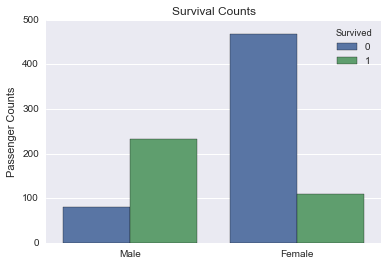

In [91]:
# Print a bar graph of the survival counts in each gender
df = titanic_df.groupby(['Sex', 'Survived']).apply(len).reset_index()
p = sns.barplot(data = df, x = 'Sex', y = 0, hue = 'Survived')
p.set_xticklabels(['Male', 'Female'])
p.set(xlabel = '', ylabel = 'Passenger Counts', title = 'Survival Counts')

<font face="arial"> In the plot above, we can see a difference between the male and female survival data by looking at a histogram. We see above that the Female data shows a higher percentage of females survived over Males. The data also shows that there were less male survivors in total over female survivors.</font>

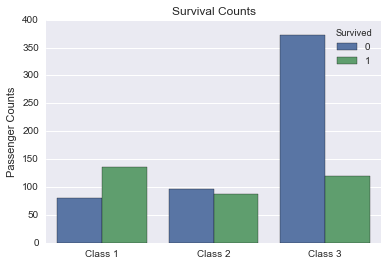

In [92]:
# Print a bar graph of the survival counts in each passenger class
df = titanic_df.groupby(['Pclass', 'Survived']).apply(len).reset_index()
p = sns.barplot(data = df, x = 'Pclass', y = 0, hue = 'Survived')
p.set_xticklabels(['Class 1', 'Class 2', 'Class 3'])
p.set_yticklabels = (['Died', 'Survived'])
p.set(xlabel = '', ylabel = 'Passenger Counts', title = 'Survival Counts')

<font face="arial"> In the plot above, we can see a large difference in survivor amounts between the passenger classes. The majority of class 1 passengers survived the event, whereas the majority of passengers of class 3 did not survive.</font>

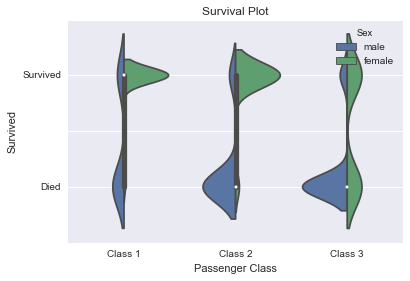

In [93]:
# Print a plot of the combination of Passenger Class, Sex, and Survival outcome
p = sns.violinplot(data = titanic_df, x = 'Pclass', y = 'Survived', split = True, hue="Sex")
p.set(title = 'Survival Plot', xlabel = 'Passenger Class', yticklabels = ['','Died', '', 'Survived'])
p.set_xticklabels(['Class 1', 'Class 2', 'Class 3'])

<font face="arial"> To analyze the data further, I will use a non-parametric test called the Chi-Squared test. The survival outcome is categorical data (survived / did not survive) and therefore requires a non-parametric test to prove the difference in frequency of outcome is statistically significant.</font>

<font size="4" color="Blue" face="arial"><b> Question 1: Chi-Squared Test ( X^2 ) for Goodness of Fit </b></font>

<font face="arial">First I will address Quesion #1:<br>
Among the passengers, was either gender more likely to survive the Titanic event?<br><br>
The Null Hypothesis (H0):<br>
H0 : The gender of the passenger did not have an affect on the survival rate of the passenger.<br><br>
The Chi-Squared test for Goodness of Fit compares an observed frequency to the expected frequency. The expected frequency in this case is calculated using the survival data on the entire passenger group, and will serve as the null hypothesis. The observed frequency is the survival data on the women passengers and will be compared against the expected rate.</font>

In [369]:
# Gender Survival Data:
print titanic_df.groupby('Sex')[ 'Survived' ].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
dtype: int64


In [370]:
# Create some variables to be used to calculate the Chi-Squared statistic
womenPassengerCount = float( 233 + 81 )
womenSurvivorCount  = float( 233 )
menSurvivorCount    = float( 109 )
totalSurvivorCount  = float( womenSurvivorCount + menSurvivorCount )
totalPassengerCount = float( titanic_df.groupby('Survived')['PassengerId'].count().sum() )
survivalRateAll     = float( totalSurvivorCount / totalPassengerCount )

# Calculate the expected amount of women survivors based on the total survivor rate
expectedWomenSurvivors    = round( womenPassengerCount * survivalRateAll )
expectedWomenNotSurvivors = round( womenPassengerCount * (1-survivalRateAll) )

# Create a dataframe to show the observed and expected frequencies
frequencies_df = pd.DataFrame( 
    {'Survived'        : pd.Series (data  = [expectedWomenSurvivors   , 233       ], 
                                    index = ['Expected'               , 'Observed'] ),
     'Did Not Survive' : pd.Series (data  = [expectedWomenNotSurvivors, 81        ], 
                                    index = ['Expected'               , 'Observed'] )
    }
)

# Dataframe containing the expected and observed frequencies of women survivor data
frequencies_df

,Did Not Survive,Survived
Expected,193,121
Observed,81,233


<font face="arial">Calculate the Chi-Squared test statistic<br>
Χ^2 = Σ [ (Fo - Fe)^2 / Fe ]</font>

In [360]:
# Function to calculate the chi-squared statistic, given a series
def calc_chiSquared( frequencies_s ):
    return math.pow( frequencies_s['Observed'] - frequencies_s['Expected'], 2 ) / frequencies_s['Expected']

# Calculate the chi-squared test statistic
# Use the built-in apply() function which applies a function to each column
chiSquared_s = frequencies_df.apply( calc_chiSquared )
chiSquared_1 = chiSquared_s.sum()

print "ChiSquared = %d" % (chiSquared_1)

ChiSquared = 168


<i>Calculating the Chi-Squared Test Statistic for the survival rate on female passengers, I have found that<br>
<b> Χ^2 = 168 </b><br><br>
Next we must calculate the critical value to compare our test statistic against. We have two categories in our test, so we have 1 degree of freedom<br>
<b> DF = 1 </b><br><br>
We use the test statistic and degree of freedom value to plug into GraphPad QuickCalcs and get a one-tailed p-value:<br><b>P value is less than 0.0001</b><br>
By conventional criteria, this difference is considered to be extremely statistically significant.

<font size="4" color="Blue" face="arial"><b> Question 2: Chi-Squared Test ( X^2 ) for Independence</b></font>

<font face="arial">Next I will analyze Quesion #2 using the same process as Question#1:<br>
How did the passenger class affect the survival rate?<br><br>
The Null Hypothesis (H0):<br>
H0 : All passenger classes had an equal survival rate<br><br></font>

In [371]:
# Gender Survival Data:
print titanic_df.groupby('Pclass')[ 'Survived' ].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
dtype: int64


In [372]:
# Create some variables to be used to calculate the Chi-Squared Statistic
pclass1PassengerCount = float( 136 +  80 )
pclass2PassengerCount = float(  97 +  87 )
pclass3PassengerCount = float( 372 + 119 )

pclass1SurvivorCount  = float( 136 )
pclass2SurvivorCount  = float(  87 )
pclass3SurvivorCount  = float( 119 )

totalSurvivorCount  = float( pclass1SurvivorCount + pclass2SurvivorCount + pclass3SurvivorCount )
totalPassengerCount = float( titanic_df.groupby('Survived')['PassengerId'].count().sum() )
survivalRateAll     = float( totalSurvivorCount / totalPassengerCount )

# Create a dataframe to show the observed and expected frequencies
observedFrequencies_df = pd.DataFrame( 
    {'Class 1' : pd.Series (data  = [ pclass1SurvivorCount, (pclass1PassengerCount-pclass1SurvivorCount) ], 
                            index = ['Survived'           , 'Did Not Survive'] ),
     'Class 2' : pd.Series (data  = [ pclass2SurvivorCount, (pclass2PassengerCount-pclass2SurvivorCount) ], 
                            index = ['Survived'           , 'Did Not Survive'] ),
     'Class 3' : pd.Series (data  = [ pclass3SurvivorCount, (pclass3PassengerCount-pclass3SurvivorCount) ], 
                            index = ['Survived'           , 'Did Not Survive'] )
    }
)

# Set the top left corner text description
observedFrequencies_df.columns.name = "Observed"

# Dataframe containing the expected and observed frequencies of women survivor data
observedFrequencies_df

Observed,Class 1,Class 2,Class 3
Survived,136,87,119
Did Not Survive,80,97,372


In [373]:
# Create a dataframe to show the expected frequencies
rowTotal    = expectedFrequencies_df.sum(axis=1)
columnTotal = expectedFrequencies_df.sum()
grandTotal  = expectedFrequencies_df.sum().sum()

class1ExpectedSurv = (rowTotal['Survived'] * columnTotal['Class 1']) / grandTotal
class2ExpectedSurv = (rowTotal['Survived'] * columnTotal['Class 2']) / grandTotal
class3ExpectedSurv = (rowTotal['Survived'] * columnTotal['Class 3']) / grandTotal

class1ExpectedNot = (rowTotal['Did Not Survive'] * columnTotal['Class 1']) / grandTotal
class2ExpectedNot = (rowTotal['Did Not Survive'] * columnTotal['Class 2']) / grandTotal
class3ExpectedNot = (rowTotal['Did Not Survive'] * columnTotal['Class 3']) / grandTotal

expectedFrequencies_df = pd.DataFrame( 
    {'Class 1' : pd.Series (data  = [class1ExpectedSurv, class1ExpectedNot], 
                            index = ['Survived'        , 'Did Not Survive'] ),
     'Class 2' : pd.Series (data  = [class2ExpectedSurv, class2ExpectedNot], 
                            index = ['Survived'        , 'Did Not Survive'] ),
     'Class 3' : pd.Series (data  = [class3ExpectedSurv, class3ExpectedNot], 
                            index = ['Survived'        , 'Did Not Survive'] )
    }
)

# Set the top left corner text description
expectedFrequencies_df.columns.name = "Expected"

# Dataframe containing the expected and observed frequencies of women survivor data
expectedFrequencies_df

Expected,Class 1,Class 2,Class 3
Survived,82.909091,70.626263,188.464646
Did Not Survive,133.090909,113.373737,302.535354


<font face="arial">Calculate the Chi-Squared test statistic<br>
Χ^2 = Σ [ (Fo - Fe)^2 / Fe ]</font>

In [374]:
# Calculate the chi-squared test statistic
chiSquared_df = (observedFrequencies_df - expectedFrequencies_df) * (observedFrequencies_df - expectedFrequencies_df)
chiSquared_df = chiSquared_df / expectedFrequencies_df
chiSquared_2  = chiSquared_df.sum().sum()

print "ChiSquared = %d" % (chiSquared_2)

ChiSquared = 102


<i>Calculating the Chi-Squared Test Statistic for the survival rate on female passengers, I have found that<br>
<b> Χ^2 = 102 </b><br><br>
Next we must calculate the critical value to compare our test statistic against. We have three categories in our test, so we have 2 degree of freedom<br>
<b> DF = 2 </b><br><br>
We use the test statistic and degree of freedom value to plug into GraphPad QuickCalcs and get a one-tailed p-value:<br><b>P value is less than 0.0001</b><br>
By conventional criteria, this difference is considered to be extremely statistically significant.

<font face="arial">In this second test, we have a 2 x 3 contigency table, so I'll calculate Cramer's V to measure the strength between the two variables ( passenger class and survival outcome ).<br>
V = SQRT( Χ^2 / (n (k - 1)) )</font>

In [375]:
# Smaller of the two ( rows and columns )
k = 2

# number of passengers
n = 891

# Calculate Cramer's V
V = math.sqrt( chiSquared_2 / ( n * (k-1) ))

print V

0.339817388005


<font face="arial"> Cohen's guidelines for effect size are the following:

<pre>
df*	small	medium	large
1	  0.10	 0.30      0.50
2	  0.07	 0.21      0.35
3	  0.06	 0.17      0.29
</pre>

Since V=0.34 and DF=2, our effect size is relatively strong.</font>

<font size="4" color="Blue" face="arial"><b> Conclusions </b></font>

<font face="arial">
Question 1: Among the passengers, was either gender more likely to survive the Titanic event?<br>
I performed a Chi-Squared test to test the null hypothesis that both genders had equal survival rates. The results were extremely statistically significant. With a resulting P value less than 0.0001, I am able to reject the null hypothesis and conclude that women aboard the Titanic in fact had a larger survival rate over men.<br><br>
Question 2: How did the passenger class affect the survival rate?<br>
I performed another Chi-Squared test to test the null hypothesis that all passenger classes had an equal survival rate. The results for this test were also extremely statistically significant. With a resulting P value less than 0.0001, I am able to reject the null hypothesis and conclude that passenger class did affect the survival rate of passengers. Passenger Class 1 had the highest survival rate, and Passenger Class 3 had the lowest survival rate. Since the degrees of freedom was larger than 1, I also calculated Cramer's V to measure effect size. The result showed the effect size is relatively strong according to Cohen's guidelines. 
</font>

<font size="4" color="Blue" face="arial"><b> Limitations </b></font>

<font face="arial">
There are some limitations to the analysis I just provided. The data collected is a limited set of passenger data. There are 891 passenger data points in this dataset, however it has been reported that the Titanic had approximately 2,200 passengers aboard. We could also see that there were some missing values in the dataset provided. The dataset is assumed to be accurate, however there could be an issue with the validity of the data as well.
</font>